## Tutorial 8

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

path = "../src/"

## Question 1

In [15]:
data = pd.read_table(path + "data/weeklies.txt", sep=",")
data

,magazine,current,lastyear
0,Business Week,88.36,118.03
1,The Economist,48.00,65.00
2,Newsweek,17.73,42.78
3,The New Republic,9.33,10.47
4,Time,19.46,71.37
5,US News & World Report,11.00,38.09
6,The Weekly Standard,10.00,14.00
7,Auto Week,25.41,22.33
8,Entertainment Weekly,36.00,29.36
9,Golf World,33.67,14.32


In [74]:
x = data.current
y = data.lastyear
print(np.std(x), np.std(y))
t_out = stats.ttest_rel(x, y, alternative="two-sided")
print(t_out.pvalue)
ci_90 = t_out.confidence_interval(confidence_level=0.90)
print(ci_90)

23.248678037060817 31.653739325653117
0.08026526054859677
ConfidenceInterval(low=np.float64(-19.431690236237465), high=np.float64(-0.6472571321835918))


Text(0, 0.5, 'Frequency')

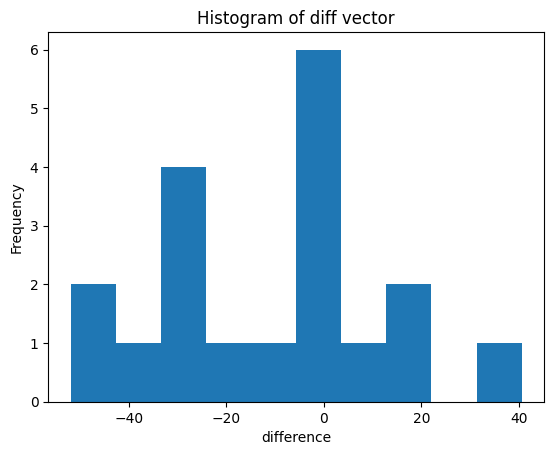

In [75]:
diff = data.current - data.lastyear
fig = diff.hist(grid=False)
fig.set_title("Histogram of diff vector")
fig.set_xlabel("difference")
fig.set_ylabel("Frequency")

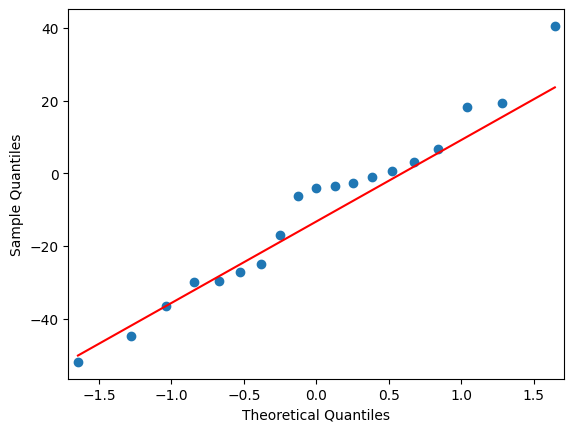

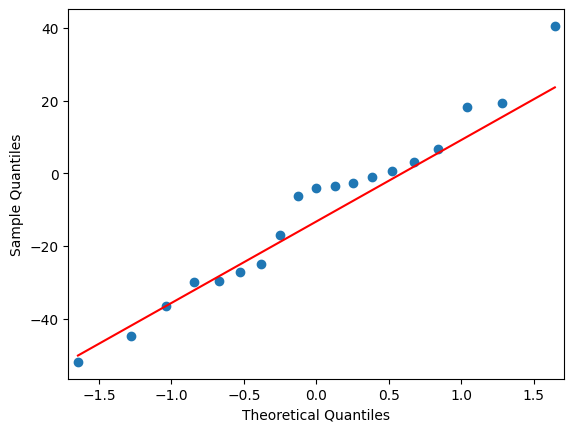

In [31]:
sm.qqplot(diff, line='q')

In [32]:
def checkNormality(data):
    result = stats.shapiro(data)
    if result.pvalue < 0.05:
        print("Data dose NOT follow normal distribution")
    else:
        print("Data follows normal distribution")

checkNormality(diff)

Data follows normal distribution


In [43]:
def get_skewness(x):
    x_bar = np.mean(x)
    dist = x - np.mean(x)
    return ((x - x_bar)**3).mean() / np.var(x)**(3/2)

get_skewness(diff)

np.float64(0.12838147993895702)

In [45]:
def get_kurt(x):
    x_bar = np.mean(x)
    return ((x - x_bar)**4).mean() / np.var(x)**2 - 3

get_kurt(diff)


np.float64(-0.4401951705737881)

In [47]:
np.quantile(diff, 0.25)

np.float64(-28.380000000000003)

In [48]:
def h(x):
    Q1 = np.quantile(x, 0.25)
    Q2 = np.median(x)
    Q3 = np.quantile(x, 0.75)
    return (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)

h(diff)

np.float64(-0.6108358110340271)

## Question 2

In [60]:
machine_data = pd.read_table(path + "data/machine.txt", sep=" ")
machine_data
new = machine_data[(machine_data.machine == 'N')].strength
old = machine_data[(machine_data.machine == 'O')].strength
old

0     43.6
1     78.4
2     62.1
3     65.1
4     69.2
5     79.5
6     80.7
7     59.2
8     47.2
9     65.9
10    49.2
11    71.3
12    62.9
13    62.3
14    58.1
15    63.0
16    63.4
17    71.6
18    74.0
19    64.3
20    65.8
21    61.7
22    47.9
23    59.5
24    81.5
25    53.9
26    74.8
27    75.3
28    82.8
29    79.8
30    61.4
31    66.3
32    53.7
33    59.8
34    89.8
35    70.8
36    55.4
37    66.1
38    60.6
39    52.7
40    73.2
41    50.8
42    58.2
43    63.4
44    59.7
45    55.6
46    66.2
47    60.6
48    67.4
49    46.7
Name: strength, dtype: float64

In [61]:
def checkNormality(data):
    result = stats.shapiro(data)
    if result.pvalue < 0.05:
        print("Data dose NOT follow normal distribution")
    else:
        print("Data follows normal distribution")

checkNormality(new)
checkNormality(old)

Data follows normal distribution
Data follows normal distribution


In [76]:
t_out = stats.ttest_ind(new, old)
t_out.pvalue

np.float64(0.00015810425164191597)

## Question 3

In [ ]:
flex1 = pd.read_table(path + "data/flextime.txt", sep=' ')
flex1


,employee,before,after
0,1,54,68
1,2,25,42
2,3,82,80
3,4,76,91
4,5,63,70
5,6,82,88
6,7,94,90
7,8,72,81
8,9,33,38
9,10,90,93


In [67]:
wsr_out = stats.wilcoxon(flex1.before, flex1.after, correction=True, method='approx')
print(f"""Test statistic: {wsr_out.statistic:.3f}. p-val: {wsr_out.pvalue:.3f}.""")

Test statistic: 4.000. p-val: 0.019.


Conclusion: distribution of before is location shift than distribution of after

In [71]:
flex1.iloc[:,1:].stack().reset_index()

,level_0,level_1,0
0,0,before,54
1,0,after,68
2,1,before,25
3,1,after,42
4,2,before,82
5,2,after,80
6,3,before,76
7,3,after,91
8,4,before,63
9,4,after,70
